In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import numpy as np
import yellowbrick as yb
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from yellowbrick.classifier import ClassBalance
from yellowbrick.classifier import DiscriminationThreshold

In [2]:
# Load the classification data set
data = pd.read_csv('../51/file.csv')

In [5]:
#data
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])
# features of interest
f = ['Temperature','Humidity', 'Light', 'CO2','HumidityRatio']
classes = ['unoccupied','occupied']
# instances and target
X = data[f]
y=data.Occupancy

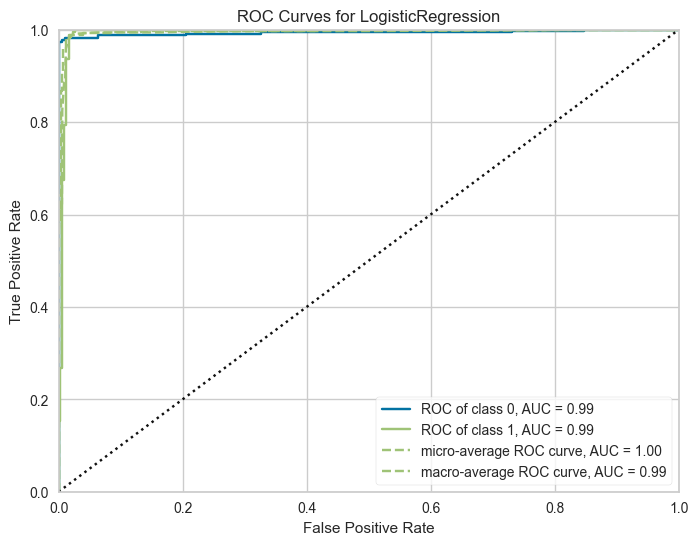

In [6]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
v = ROCAUC(LogisticRegression(),size=(800,600))

v.fit(X_train,y_train)

v.score(X_test,y_test)

g= v.poof()

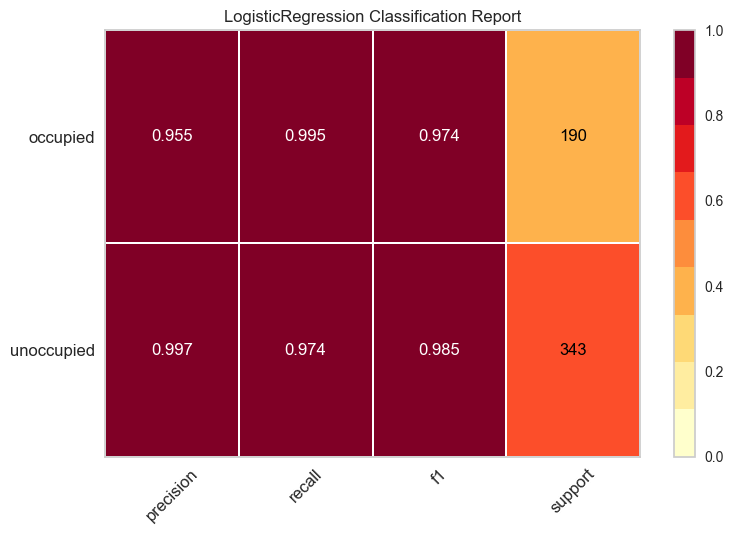

In [7]:
v = ClassificationReport(LogisticRegression(),classes=classes,support=True)
v.fit(X_train,y_train)
v.score(X_test,y_test)
g=v.poof()

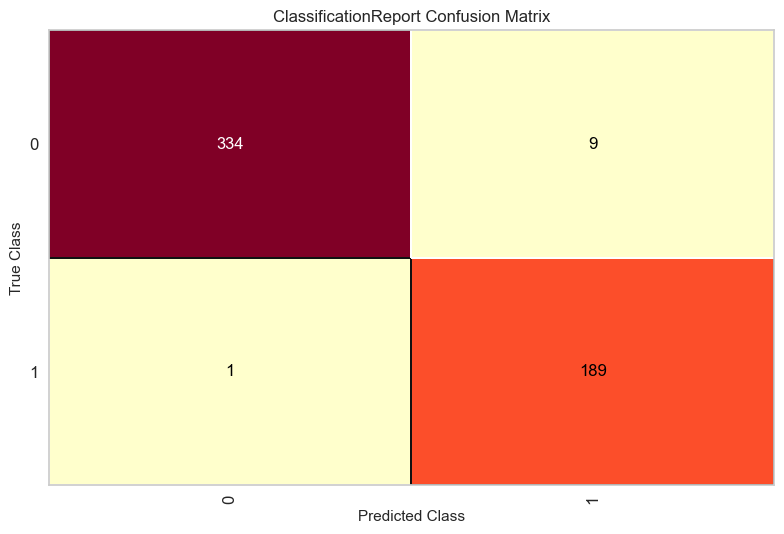

<Axes: title={'center': 'ClassificationReport Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [8]:
c = ConfusionMatrix(v,classes=[0,1])
c.score(X_test,y_test)
c.poof()

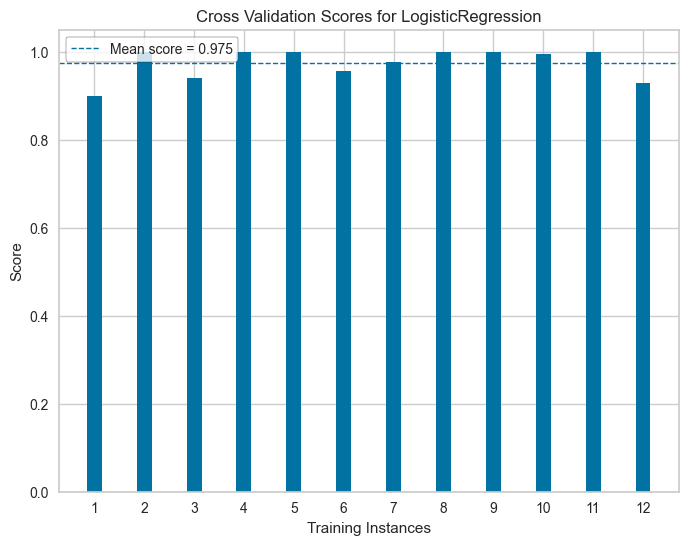

<Axes: title={'center': 'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [9]:
_,ax = plt.subplots()
cv = StratifiedKFold(12)
v = CVScores(LogisticRegression(),ax=ax,cv=cv,scoring='f1_weighted',size=(800,600))
v.fit(X,y)
v.poof()

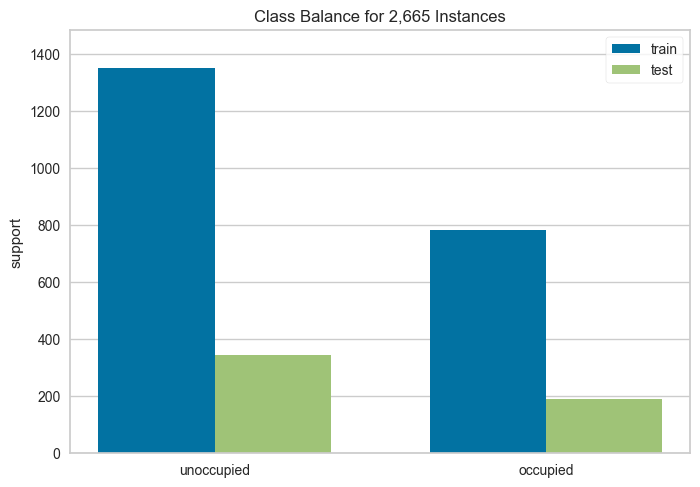

<Axes: title={'center': 'Class Balance for 2,665 Instances'}, ylabel='support'>

In [10]:
v = ClassBalance(labels=classes)
v.fit(y_train,y_test)
v.poof()

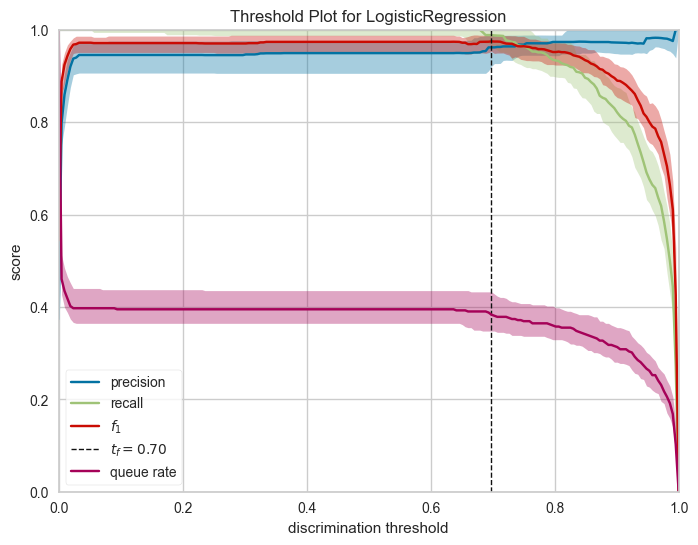

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [11]:
v = DiscriminationThreshold(LogisticRegression(),size=(800,600))
v.fit(X_train,y_train)
v.poof()